# Yellowbrick Regression Visualizers

This notebook serves as a quick reference to the Yellowbrick functionality with regards to regression score visualizers.

Source: https://www.scikit-yb.org/en/latest/api/regressor/index.html

## Residuals Plot

[]() | []()
---------- | -------------
Visualizer | ```ResidualsPlot```
Quick Method | ```residuals_plot()```
Models | Regression
Workflow | Model Evaluation

In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np

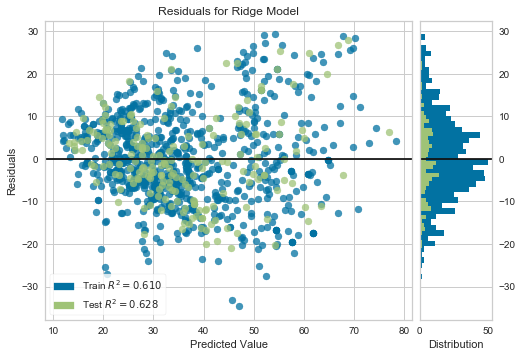

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

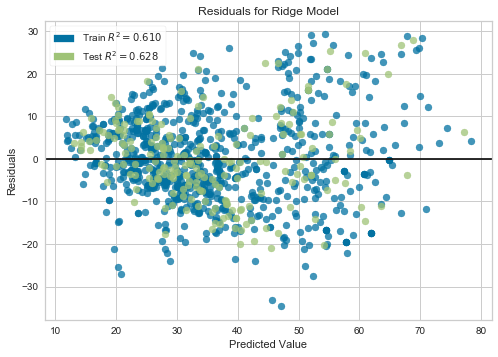

In [3]:
# Can turn off hist
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Quick Method

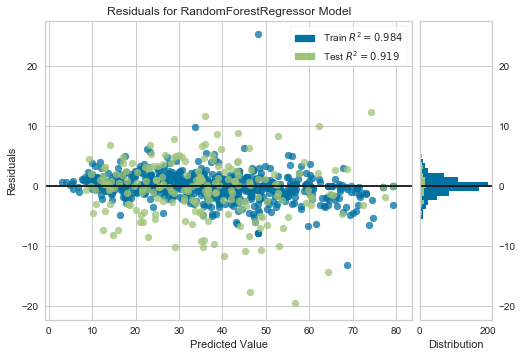

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from yellowbrick.regressor import residuals_plot
from yellowbrick.datasets import load_concrete

# Load the dataset and split into train/test splits
X, y = load_concrete()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = residuals_plot(RandomForestRegressor(), X_train, y_train, X_test, y_test)

## Prediction Error Plot

[]() | []()
---------- | -------------
Visualizer | ```PredictionError```
Quick Method | ```prediction_error()```
Models | Regression
Workflow | Model Evaluation

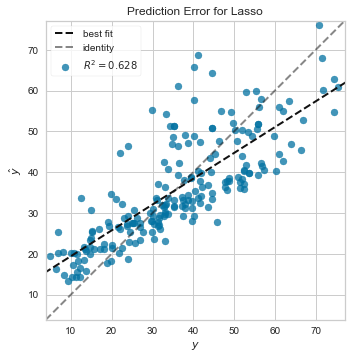

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Quick Method

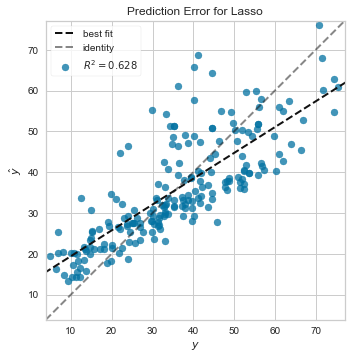

In [6]:
from yellowbrick.regressor import prediction_error

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

## Alpha Selection

[]() | []()
---------- | -------------
Visualizer | ```AlphaSelection```
Quick Method | ```alphas()```
Models | Regression
Workflow | Model Evaluation, Hyperparameter Tuning

__NOTE__: The selected regressor should end in CV. To use non-CV regressors see: ```ManualAlphaSelection``` documentation.

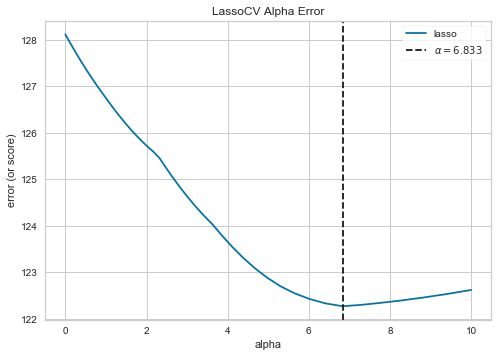

In [7]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()

### Quick Method

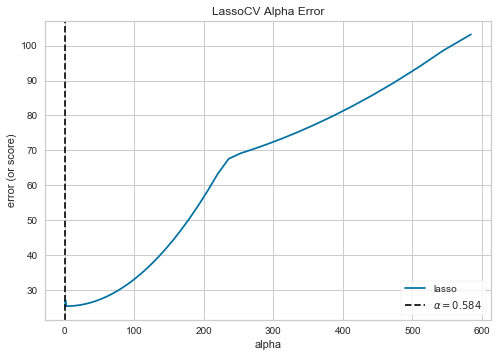

AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5F12AC948>,
               model=None)

In [8]:
from yellowbrick.regressor.alphas import alphas

from yellowbrick.datasets import load_energy

# Load dataset
X, y = load_energy()

# Use the quick method and immediately show the figure
alphas(LassoCV(random_state=0), X, y)

## Cook's Distance

[]() | []()
---------- | -------------
Visualizer | ```CooksDistance```
Quick Method | ```cooks_distance()```
Models | General Linear Models
Workflow | Dataset/Sensitivity Analysis

Cook’s Distance is a measure of how influential an instance is to the computation of a regression, e.g. if the instance is removed would the estimated coefficients of the underlying model be substantially changed? Because of this, Cook’s Distance is generally used to detect outliers in standard, OLS regression. In fact, a general rule of thumb is that D(i) > 4/n is a good threshold for determining highly influential points as outliers and this visualizer can report the percentage of data that is above that threshold.Instances with a large influence may be outliers and datasets that have a large number of highly influential points might not be good predictors to fit linear models.

C:\Users\aronf\Anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


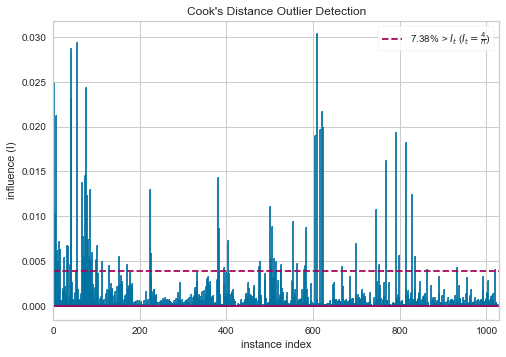

In [9]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

### Quick Method

C:\Users\aronf\Anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


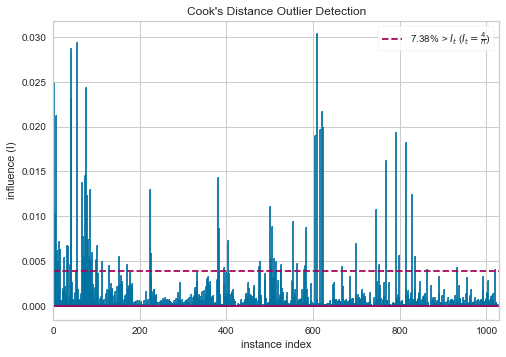

CooksDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5F3061148>)

In [10]:
from yellowbrick.regressor import cooks_distance

# Load the regression dataset
X, y = load_concrete()

# Instantiate and fit the visualizer
cooks_distance(
    X, y,
    draw_threshold=True,
    linefmt="C0-", markerfmt=",",use_line_collection=True)